In [7]:
!pip install seaborn --upgrade
!pip install koreanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 7.6 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 18.3 MB/s eta 0:00:00


In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [12]:
%config InlineBackend.figure_foremat = 'retina'

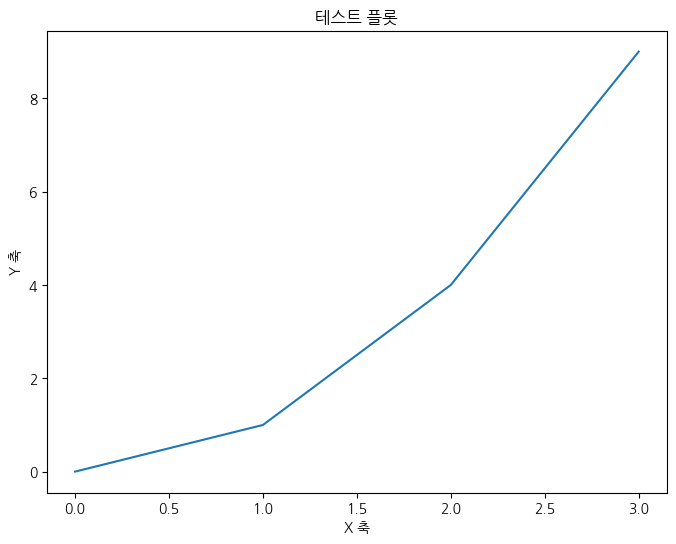

In [17]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic' # 폰트 설정 부분 안되면 바꾸셈

# 마이너스 폰트 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 테스트
plt.figure(figsize=(8, 6))
plt.plot([0, 1, 2, 3], [0, 1, 4, 9])
plt.title('테스트 플롯')
plt.xlabel('X 축')
plt.ylabel('Y 축')
plt.show()

In [18]:
data = pd.read_csv("/content/drive/MyDrive/프로 스포츠 시청률 하락에 관하여.csv") # 이 부분만 바꾸셈

# EDA 바꾸면 안됨
data['성별'] = data['성별을 선택해 주세요']
data['시청 여부'] = data['평소 프로 스포츠 시청을 좋아하시나요?']
data['시청 빈도'] = data['주로 스포츠를 얼마나 자주 시청하시나요?']
data['최근 시청 시간 감소'] = data['최근 들어 스포츠 시청 시간이 줄어들었다고 느끼셨나요?']

In [ ]:
# 성별에 따른 프로 스포츠 시청 선호도
# 일반 코드
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='성별', hue='시청 여부', palette='Set2')
plt.title('성별에 따른 프로 스포츠 시청 선호도')
plt.xlabel('성별')
plt.ylabel('응답 수')
plt.legend(title='시청 여부')
plt.show()

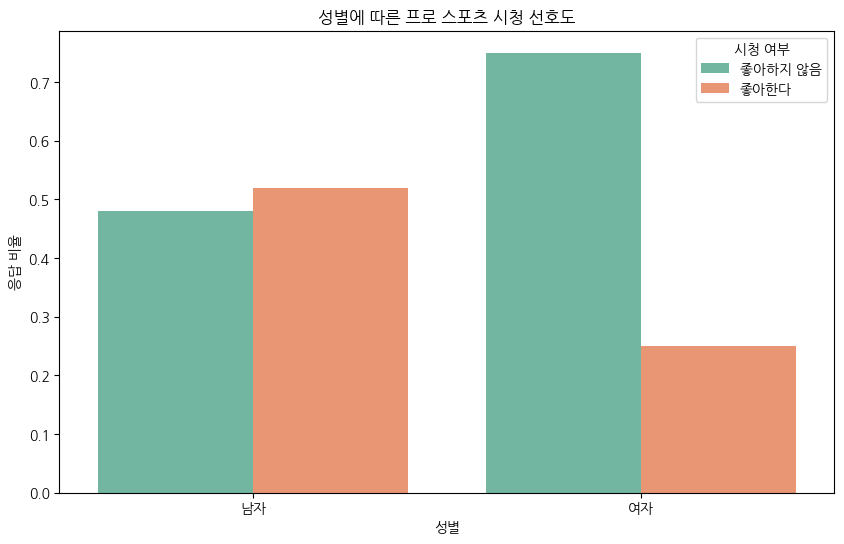

In [26]:
# 성별에 따른 프로 스포츠 시청 선호도
# 보정 코드

gender_counts = data['성별'].value_counts()
data['비율'] = data.groupby('성별')['성별'].transform('count')
data['보정된 수'] = 1 / data['비율']

plot_data = data.groupby(['성별', '시청 여부']).size().reset_index(name='응답 수')
plot_data['비율'] = plot_data['응답 수'] / plot_data['성별'].map(gender_counts)

plt.figure(figsize=(10, 6))
sns.barplot(data=plot_data, x='성별', y='비율', hue='시청 여부', palette='Set2')
plt.title('성별에 따른 프로 스포츠 시청 선호도')
plt.xlabel('성별')
plt.ylabel('응답 비율')
plt.legend(title='시청 여부')
plt.show()

<ipython-input-23-a61befb64d1b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='시청 빈도', order=frequency_order, palette='Set3')


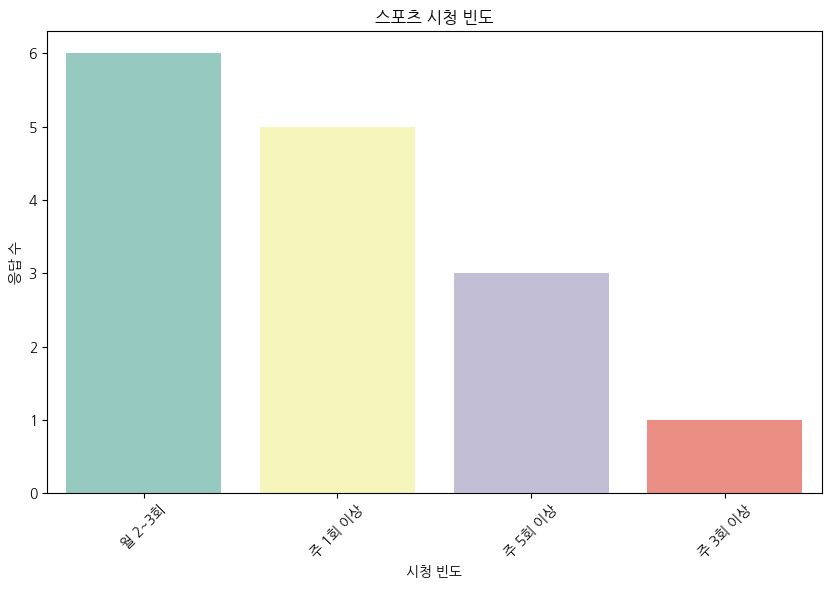

In [23]:
# 스포츠 시청 빈도
frequency_order = data['시청 빈도'].value_counts().index

plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='시청 빈도', order=frequency_order, palette='Set3')
plt.title('스포츠 시청 빈도')
plt.xlabel('시청 빈도')
plt.ylabel('응답 수')
plt.xticks(rotation=45)
plt.show()

<ipython-input-21-49944f3683cd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='최근 시청 시간 감소', palette='Set1')


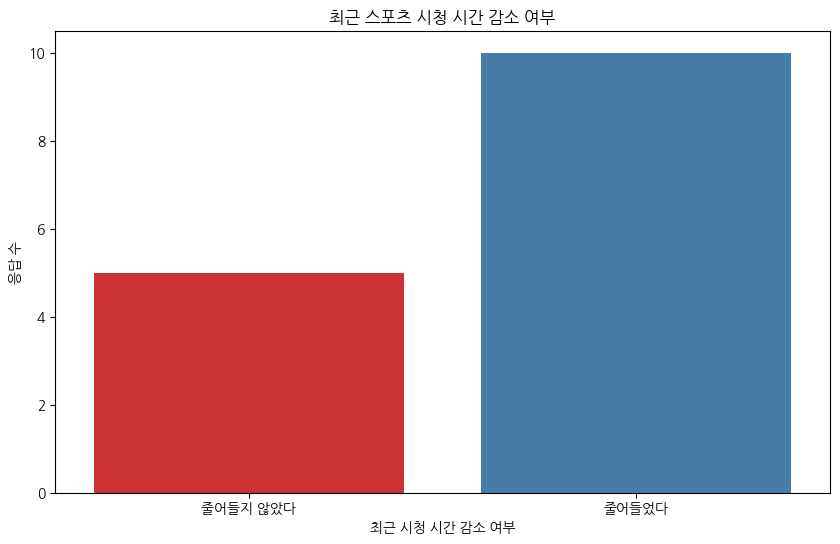

In [21]:
# 최근 스포츠 시청 시간 감소 여부
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='최근 시청 시간 감소', palette='Set1')
plt.title('최근 스포츠 시청 시간 감소 여부')
plt.xlabel('최근 시청 시간 감소 여부')
plt.ylabel('응답 수')
plt.show()

<ipython-input-22-14b684876a06>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=reasons_split, order=reasons_split.value_counts().index, palette='Set2')


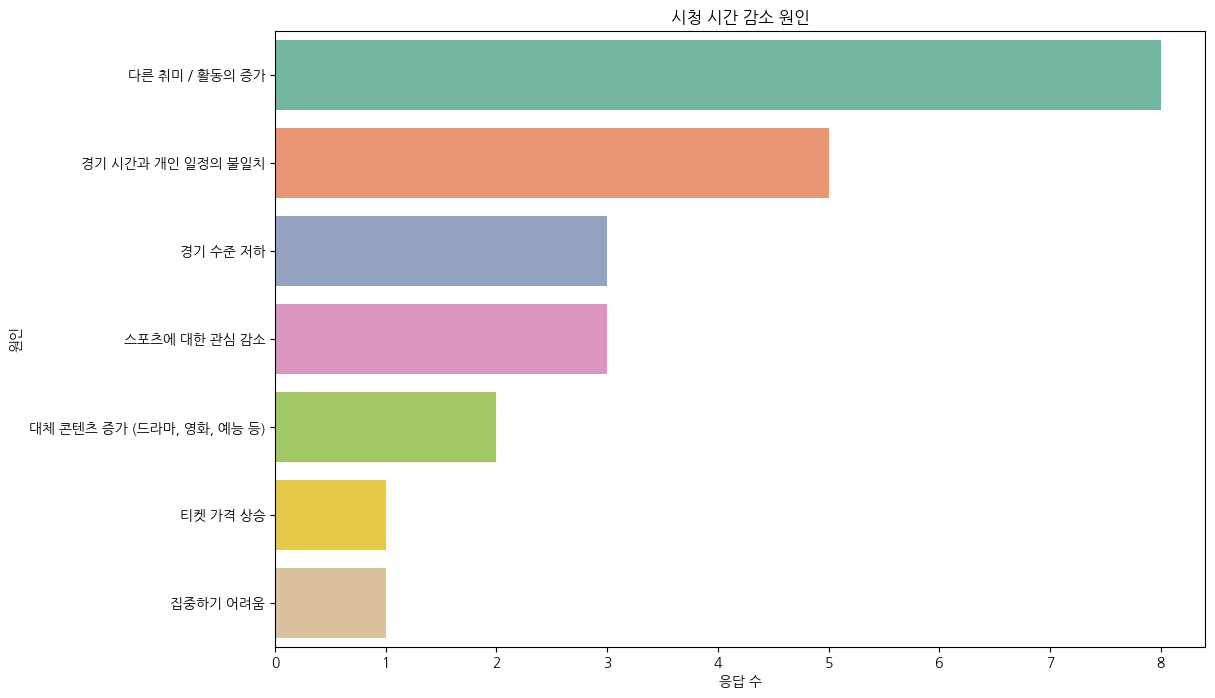

In [22]:
# 시청 시간 감소 원인 (복수 선택 가능, 컬럼 분리 필요)
# 데이터 전처리 (Null 제거 및 이유 분리)
reasons = data['시청 빈도가 줄어든 원인은 무엇이라고 생각하시나요?\n(복수 선택 가능)'].dropna()
reasons_split = reasons.str.split(';').explode().reset_index(drop=True)

plt.figure(figsize=(12, 8))
sns.countplot(y=reasons_split, order=reasons_split.value_counts().index, palette='Set2')
plt.title('시청 시간 감소 원인')
plt.xlabel('응답 수')
plt.ylabel('원인')
plt.show()